# Problem Statement- 

            Avocado is a fruit consumed by people heavily in the United States. 

* This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

* The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

* Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

* The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

# Features Desrciption-

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

# Inspiration /Label -

The aim  is to make a model that can predict the Average Price from the given data.

Importing the required libraries for this project -

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Loading the Dataset

In [2]:
dt = pd.read_csv("avocado.csv")
dt.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Here We can see the information of column available in the dataset and the data types and memory usage and detailed view of the each column with datatypes / null or non null..

We can see there are few categorical data's exist in the given dataset. 

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We will check the shape of data and the dataset contains 18249 rows and 14 columns. 
We will see further into the dataset and will see whether we need to drop any columns or any missing values exists in the dataset.

if YES, We should treat them with imputers or encoding techniques.We will discuss this in detail in later part.

In [4]:
dt.shape

(18249, 14)

Checking whether missing values present in dataset.

As we can see there is no null values/missing values present in dataset.So data is pretty much good to proceed further.

In [5]:
dt.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

The describe() function will show the count,min,max,median,Standard Deviation, quantile range of each column data's and this will be easy for us to check the data has been properly distributed or any outliers exist in the dataset or not etc..

Describe() function will display those details for numerical data's only,not for categorical data's.

In [6]:
dt.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see there are 0 as a value for few columns as minimum value which we will replace it with mean() , median() values and also outliers exist in most of the columns and we will see further on how to treat the outliers / skewness in later part.

Before proceeding, we will drop the unwanted column "Unnamed:0" as it wont have any impact on removal from dataset.

In [7]:
dt = dt.drop(columns= ['Unnamed: 0'],axis = 1)
dt

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


We will go ahead and replace 0 with mean values for the columns,

In [8]:
dt['4046'] = dt['4046'].replace(0,dt['4046'].mean())
dt['4225'] = dt['4225'].replace(0,dt['4225'].mean())
dt['4770'] = dt['4770'].replace(0,dt['4770'].mean())
dt['Total Bags'] = dt['Total Bags'].replace(0,dt['Total Bags'].mean())
dt['Small Bags'] = dt['Small Bags'].replace(0,dt['Small Bags'].mean())
dt['Large Bags'] = dt['Large Bags'].replace(0,dt['Large Bags'].mean())
dt['XLarge Bags'] = dt['XLarge Bags'].replace(0,dt['XLarge Bags'].mean())

In [9]:
dt.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We will see how the data has been distributed towards the column in the given dataset through visualization techniques.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

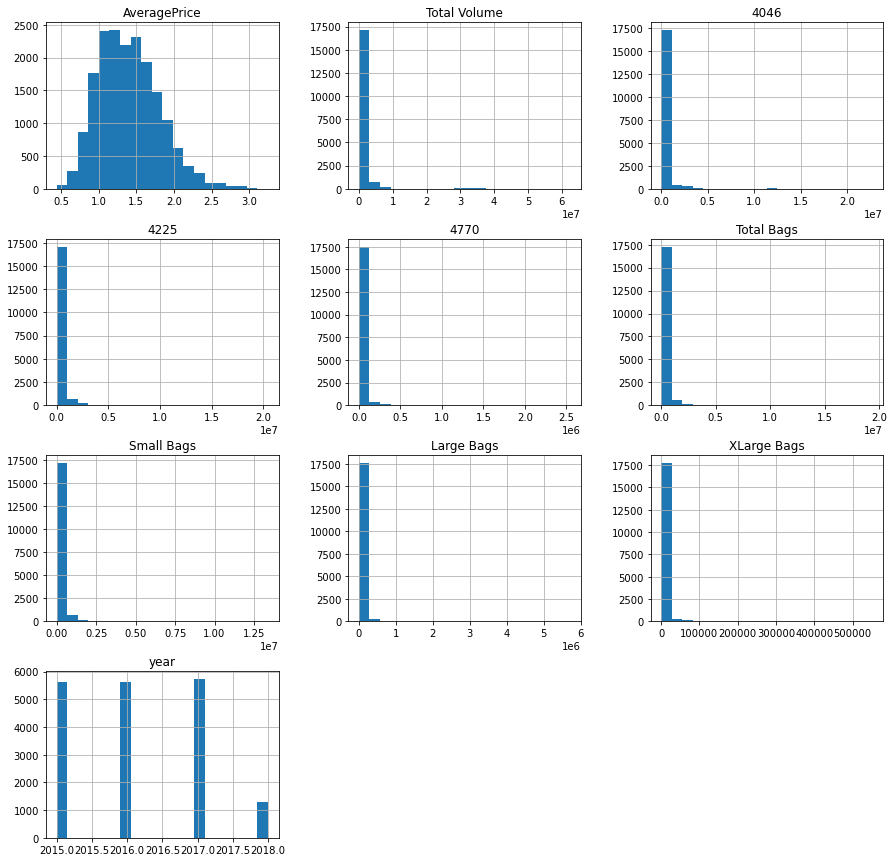

In [10]:
dt.hist(bins = 20, figsize =(15,15))

As per the above graph, We can see that target variable "AVERAGE PRICE" data is distributed normally and can seee most of the other columns has skewed. We will seee this in distplot as well to confirm how the data has been distributed.

We have column date with dd-mm-yyyy and we will encode it and split it separately as system will not understand this data.

In [11]:
#Splitting month and day from DATE column and year already exists in dataset.

dt['month'] = pd.DatetimeIndex(dt['Date']).month
dt['date'] = pd.DatetimeIndex(dt['Date']).day

We will plot graph for different columns to understand in a better way how these datas are distributed in the dataset and ratio of the data.

In [12]:
dt.groupby('year')['type'].value_counts() # count of ratio of avocado type vs year

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<AxesSubplot:xlabel='year,type'>

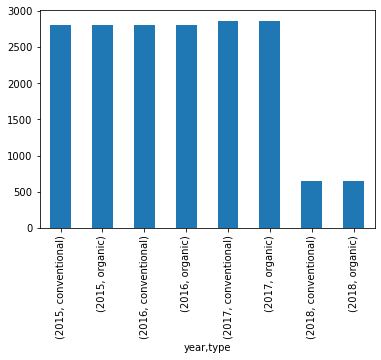

In [13]:
dt.groupby('year')['type'].value_counts().plot.bar()  # ratio of avocado type vs year

As we can see from the above graph, ratio between types of avocado / year and we can see that 2017 year is having high on graphs than other years.

<AxesSubplot:xlabel='month'>

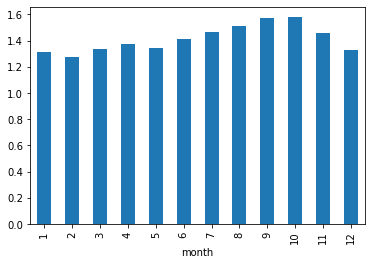

In [14]:
dt.groupby('month')['AveragePrice'].mean().plot.bar()  # ratio of price vs month

<AxesSubplot:xlabel='year'>

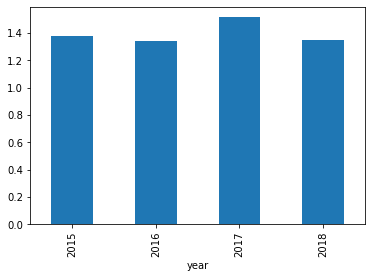

In [15]:
dt.groupby('year')['AveragePrice'].mean().plot.bar()   # ratio of year vs average price

From the above graph, It is clearly showing that september-october months has high price for Avocados in terms of price and 2017 year is high in terms of average price.

Also if we observe this 2 graphs above, we can tell that avocados are selling fast in United States and there is a slight difference only in other years and months but not a huge difference.

<AxesSubplot:xlabel='type'>

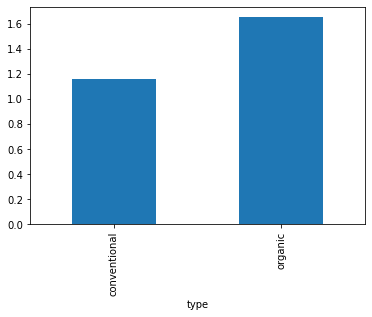

In [16]:
dt.groupby('type')['AveragePrice'].mean().plot.bar()    # ratio of type vs average price

<AxesSubplot:xlabel='year'>

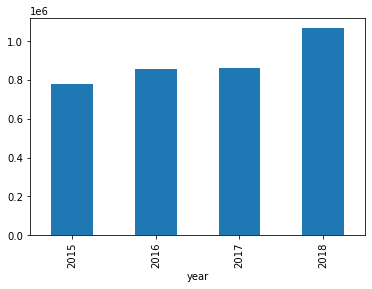

In [17]:
dt.groupby('year')['Total Volume'].mean().plot.bar()    # ratio of year vs Total volume of sales

<AxesSubplot:xlabel='type'>

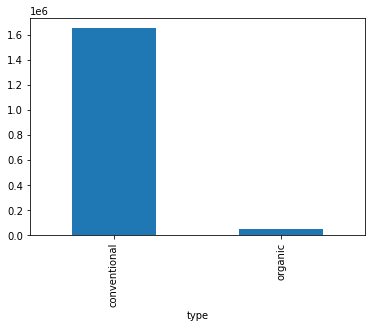

In [18]:
dt.groupby('type')['Total Volume'].mean().plot.bar()

We can see that organic avocados more than conventional in terms of price and also year 2018 recorded high in Sales of avocados and conventional one are easily available than organic in terms of total volume and that's the reason, Organic avocados are selling high in price.

As we discussed earlier, We have encoded DATE as day,month and we have two more categorical column in dataset.
We will encode that as well after checking what kinda data it have in the column.

In [19]:
# will give us the top 5 rows fro the dataset

dt.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,date
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,conventional,2015,Albany,11,29


In [20]:
#splitting categorical and numerical data,

num = dt.select_dtypes(exclude = object)
cat = dt.select_dtypes(include = object)

In [21]:
cat['type']

0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object

In [22]:
#will give us the counts of unique value present in dataset

cat['region'].value_counts()

Charlotte              338
RichmondNorfolk        338
Northeast              338
CincinnatiDayton       338
RaleighGreensboro      338
Orlando                338
California             338
HarrisburgScranton     338
PhoenixTucson          338
NewOrleansMobile       338
SouthCarolina          338
Philadelphia           338
GrandRapids            338
Pittsburgh             338
LasVegas               338
SanFrancisco           338
Plains                 338
Southeast              338
Sacramento             338
Jacksonville           338
SouthCentral           338
TotalUS                338
Spokane                338
LosAngeles             338
GreatLakes             338
HartfordSpringfield    338
Detroit                338
Nashville              338
Roanoke                338
MiamiFtLauderdale      338
Midsouth               338
Tampa                  338
Houston                338
Boise                  338
NorthernNewEngland     338
BuffaloRochester       338
Boston                 338
S

We can see that we have only 2 types of avocados and also we have so many regions and even if we convert,It may result in leakage of data.So better to drop this column as it wont affect much in dataset in terms of price and date has been splitted into day and month ,I think we can drop this column as well.

In [23]:
cat['type'] = cat['type'].replace({'conventional':0, 'organic': 1})

In [24]:
cat = cat.drop(columns = ['region','Date'],axis = 1)
cat

,type
0,0
1,0
2,0
3,0
4,0
...,...
18244,1
18245,1
18246,1
18247,1


Now our data looks clean,We will go ahead of splitting categorical and numerical data and check for outliers/skewness if any

Outliers is an data point which lies far from the other datapoints and basically it is considered as errors , wrong entry, typo mistakes.

As per the below graph for the dataset, we can see that outliers exist on most of the column. Applying Z-Score method to detect outliers.

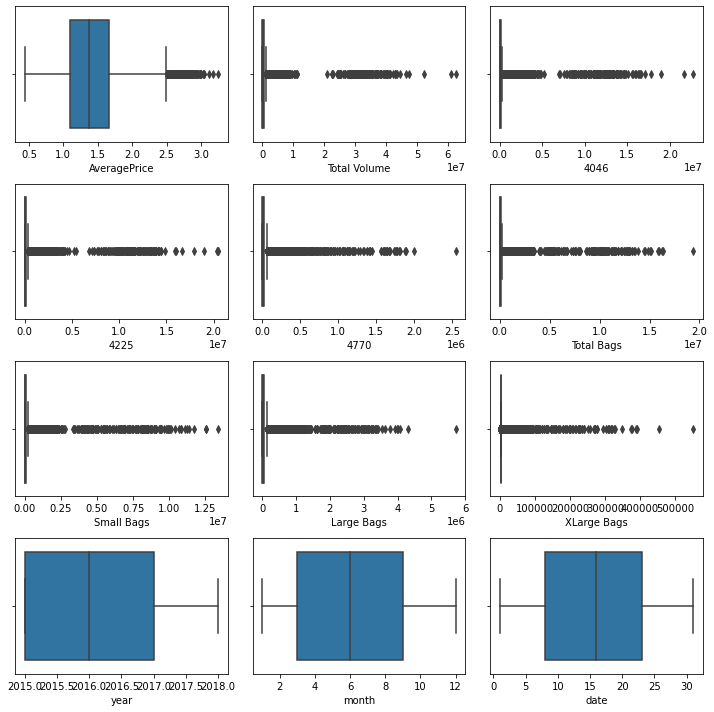

In [25]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.boxplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [26]:
from scipy.stats import zscore

z = np.abs(zscore(num))
threshold = 3
df = num[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",num.shape)
print("shape after" .ljust(20),":",df.shape)
print("% loss" .ljust(20),":",((num.shape[0]-df.shape[0])/num.shape[0])*100)

shape before and after
shape before         : (18249, 12)
shape after          : (17665, 12)
% loss               : 3.200175352074086


percentage loss of data is 3 % and <10 % is acceptable.So we will check whether outliers still exist or not or skewness is there or not.

In [27]:
df.skew()  # checking skewness in dataset after removal of outliers using z-score method

AveragePrice    0.378326
Total Volume    3.752409
4046            4.860146
4225            4.428792
4770            4.843557
Total Bags      4.048569
Small Bags      4.198751
Large Bags      4.879193
XLarge Bags     6.279517
year            0.229600
month           0.107640
date            0.011573
dtype: float64

oohhh We can see data is skewed positively for some columns and we will try to remove it through any transformation methods and can see

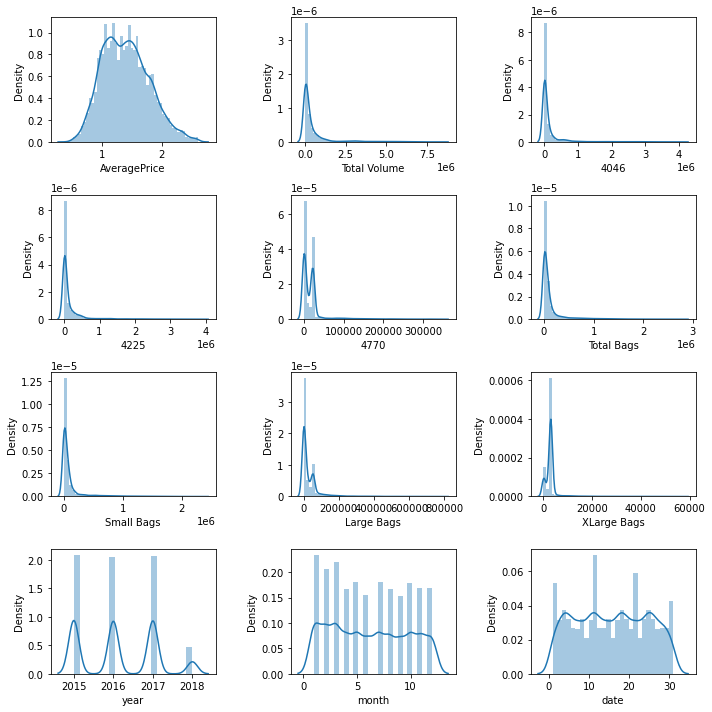

In [28]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [29]:
df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']] = df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].apply(np.cbrt)

In [30]:
df.skew()

AveragePrice    0.378326
Total Volume    1.242085
4046            1.494977
4225            1.266882
4770            0.533929
Total Bags      1.235188
Small Bags      1.236309
Large Bags      0.861053
XLarge Bags     0.321377
year            0.229600
month           0.107640
date            0.011573
dtype: float64

After applying sqrt transformation,we can see that skewness exist in dataset.We will try to replace the outliers with mode,quantile value.

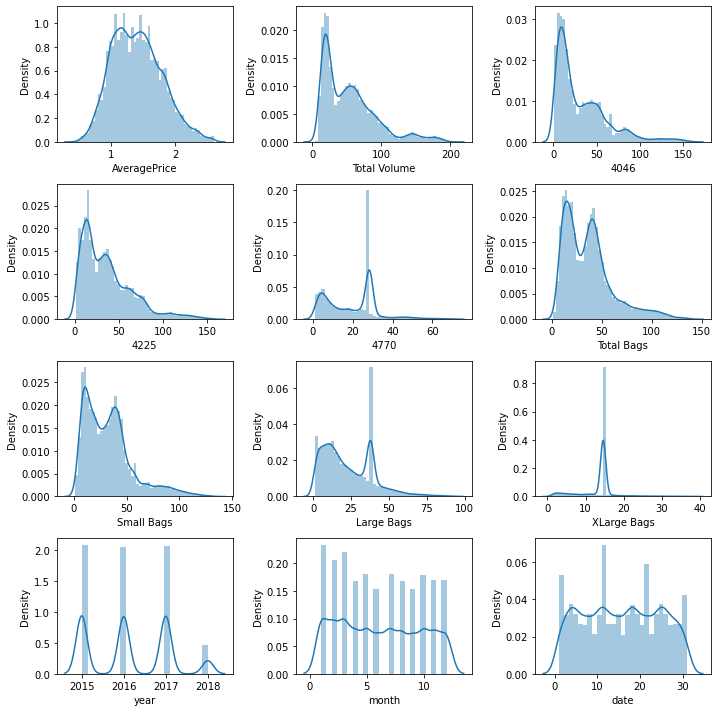

In [31]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=12:
        ax = plt.subplot(4,3,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

In [32]:
df['Total Volume'].quantile(0.75)

73.20424878540125

In [33]:
df['Total Volume'] = np.where(df['Total Volume'] > 73.2, 0, df['Total Volume'])

In [34]:
df['4046'].quantile(0.75)

47.72435178605833

In [35]:
df['4046'] = np.where(df['4046'] > 47.7, 0, df['4046'])

In [36]:
df['4225'].quantile(0.75)

50.95188336334224

In [37]:
df['4225'] = np.where(df['4225'] > 50.9, 0, df['4225'])

In [38]:
df['Total Bags'].quantile(0.75)

46.808078085446596

In [39]:
df['Total Bags'] = np.where(df['Total Bags'] > 46.8, 0, df['Total Bags'])

In [40]:
df['Small Bags'].quantile(0.75)

43.255554099777925

In [41]:
df['Small Bags'] = np.where(df['Small Bags'] > 43.2, 0, df['Small Bags'])

In [42]:
df['Large Bags'].quantile(0.75)

37.87634973333574

In [43]:
df['Large Bags'] = np.where(df['Large Bags'] > 37.87, 0, df['Large Bags'])

In [44]:
df.skew()

AveragePrice    0.378326
Total Volume    0.408454
4046            0.933658
4225            0.495736
4770            0.533929
Total Bags      0.235977
Small Bags      0.318931
Large Bags      0.700452
XLarge Bags     0.321377
year            0.229600
month           0.107640
date            0.011573
dtype: float64

Concatinating numerical and categorical after removed outliers / skewness because outliers should be applied on only numerical data even though if we change categorical into numerical,we should not apply .

In [45]:
df = pd.concat([df,cat],axis=1)   
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,date,type
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,14.591066,2015.0,12.0,27.0,0
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,14.591066,2015.0,12.0,20.0,0
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,14.591066,2015.0,12.0,13.0,0
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,14.591066,2015.0,12.0,6.0,0
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,14.591066,2015.0,11.0,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,28.372462,23.810234,23.553564,7.558651,14.591066,2018.0,2.0,4.0,1
18245,1.71,24.037003,10.602029,15.083241,28.372462,21.002902,20.754542,6.873934,14.591066,2018.0,1.0,28.0,1
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,14.591066,2018.0,1.0,21.0,1
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,14.591066,2018.0,1.0,14.0,1


As we lost around 3 % data in oultiers removal,now our dataset after merging numerical and categorical,we will have NAN in rest of the rows,so dropping NA values and reset the index

In [46]:

df = df.dropna()
df = df.reset_index(drop= True)

In [47]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,date,type
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,14.591066,2015.0,12.0,27.0,0
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,14.591066,2015.0,12.0,20.0,0
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,14.591066,2015.0,12.0,13.0,0
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,14.591066,2015.0,12.0,6.0,0
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,14.591066,2015.0,11.0,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,1.63,25.750488,12.697058,11.520945,28.372462,23.810234,23.553564,7.558651,14.591066,2018.0,2.0,4.0,1
17661,1.71,24.037003,10.602029,15.083241,28.372462,21.002902,20.754542,6.873934,14.591066,2018.0,1.0,28.0,1
17662,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,14.591066,2018.0,1.0,21.0,1
17663,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,14.591066,2018.0,1.0,14.0,1


Checking correlation between features  VS target and feature  VS features.

Here from the below heatmap ,We can see that there is not much correlation .it is kind of moderate and it is fine.

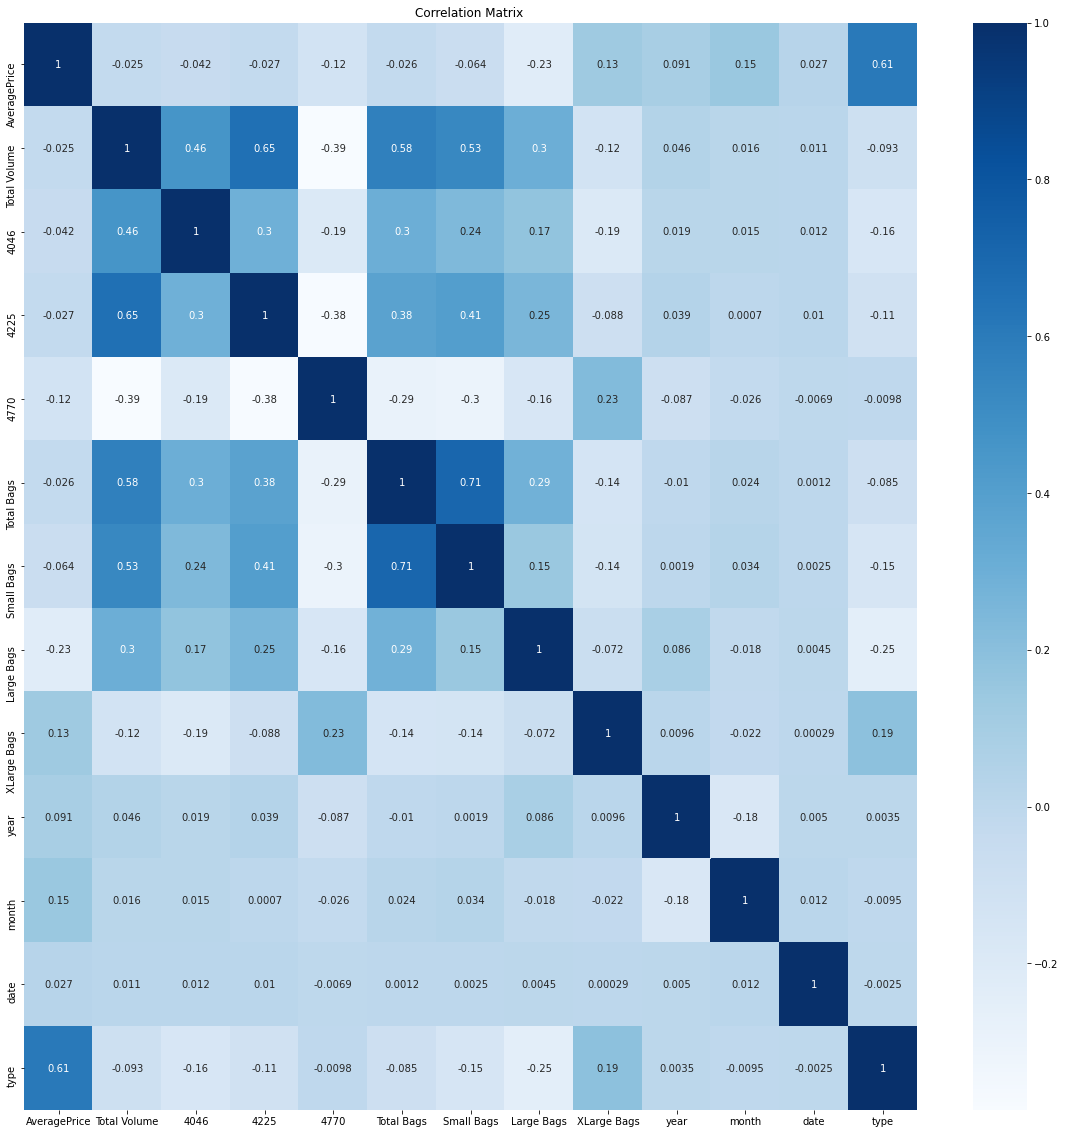

In [48]:
corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

In [49]:
df = df.sample(frac =1)   # shuffling the data

Splitting target and feature variables for building the models,

In [50]:
x = df.drop(columns = ['AveragePrice'],axis = 1)
y = df['AveragePrice']

In [51]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,date,type
6850,0.000000,37.866054,0.000000,14.423938,0.000000,0.000000,0.000000,19.008104,2017.0,6.0,11.0,0
9333,28.669015,19.035051,16.758880,4.035312,22.826534,8.807990,22.380735,14.591066,2015.0,4.0,19.0,1
14747,28.918535,6.320117,16.502197,28.372462,26.887354,10.013183,26.416235,14.591066,2017.0,4.0,9.0,1
11578,22.660073,9.442870,18.299884,7.659914,16.154314,16.146455,1.832139,14.591066,2016.0,11.0,13.0,1
16204,20.494434,6.231508,15.951978,6.902597,15.844881,13.781453,11.080756,14.591066,2017.0,2.0,26.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15004,11.883974,2.169411,10.296080,28.372462,8.323560,8.323560,0.000000,14.591066,2017.0,5.0,21.0,1
7275,0.000000,0.000000,0.000000,27.514971,0.000000,0.000000,24.474159,6.733742,2017.0,5.0,14.0,0
10931,33.399368,20.265915,27.688651,2.275995,19.742208,2.441858,19.729748,14.591066,2015.0,5.0,3.0,1
529,52.572767,38.592829,33.972226,29.132489,28.801932,25.685991,16.828648,12.966184,2015.0,10.0,11.0,0


Scaling the X variables in order to equalize the range of the different columns in the dataset

In [52]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

Splitting the train ,test data and I am taking test data 25% from the given data

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.25, random_state = 641)

In [54]:
from sklearn.metrics import r2_score

# Model Building :
    
* All the steps has been completed and now we will go ahead and start building models and will see which model works best and cross validation score and hyper parameter tuning and all.Let's go ,

Model - KNeighborsRegressor,Here I am getting r2 score as 73%

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 0.7431429024438022
MSE 0.03814201856463663
RMSE 0.1952998171136794
Train Score 0.8261054728690755
Test Score 0.7431429024438022


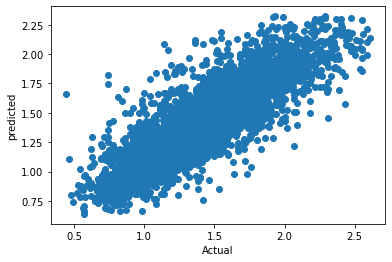

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model - Decision Tree Regressor,Here I am getting r2 score as 66.9%

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", dtr.score(x_train,y_train))
print("Test Score", dtr.score(x_test,y_test))

r2_Score 0.6777966311013988
MSE 0.04784561919855105
RMSE 0.21873641488913328
Train Score 1.0
Test Score 0.6777966311013988


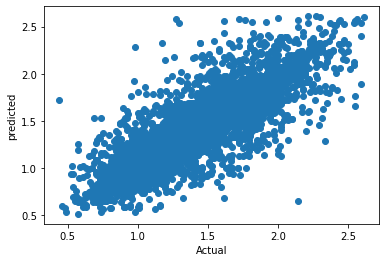

In [58]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model -Linear Regression,Here I am getting r2 score as 44%

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)


print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", lr.score(x_train,y_train))
print("Test Score", lr.score(x_test,y_test))

r2_Score 0.4459286477111183
MSE 0.08227687693353333
RMSE 0.2868394619530816
Train Score 0.44098857628484944
Test Score 0.4459286477111183


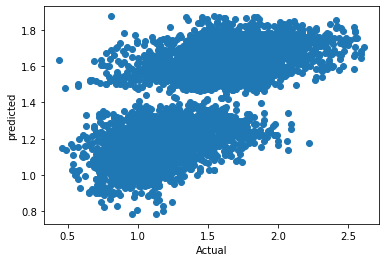

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model - Ada Boost Regressor,Here I am getting r2 score as 55%

In [61]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.5474024990054106
MSE 0.0672085079582697
RMSE 0.2592460374977209
Train Score 0.5495752578810006
Test Score 0.5474024990054106


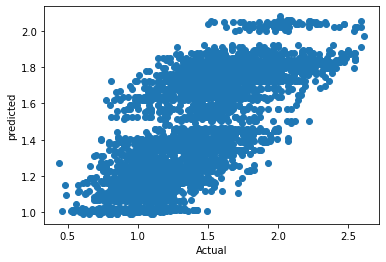

In [62]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Applying Cross Validation Score to check whether model is over fitting or under fitting.

In [67]:
score1 = np.mean(cross_val_score(knr,x,y, cv = 5))
print("Kneighbors", score1)

Kneighbors 0.6526527756817744


In [68]:
score2 = np.mean(cross_val_score(dtr,x,y, cv = 5))
print("Decsion tree", score2)

Decsion tree 0.6723691103714999


In [69]:
score3 = np.mean(cross_val_score(lr,x,y, cv = 5))
print("Liner regression", score3)

Liner regression 0.4415062519565304


In [70]:
score4 = np.mean(cross_val_score(abr,x,y, cv = 5))
print("Ada Boost", score4)

Ada Boost 0.543875885922318


After applying cross validation score for all the models, I am choosing Decision Tree Regressor as final model based on the difference between model and cross val score and choosing the best model which is less difference.

Applying Hyper Parameter Tuning for the selected model which is Decision Tree to increase the model accuracy.

In [71]:
param = {'criterion' : ['mse'] ,
         'splitter': ['best','random'], 
         'max_depth':[210,212,214,216],
         'random_state' : [400,425,450,475],
         'max_leaf_nodes': [200,230,260,290],
         'min_samples_leaf':[2,4,6],
         'max_features': [10]
          }

In [72]:
gs = GridSearchCV(dtr, param_grid = param, cv = 5)

In [73]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [210, 212, 214, 216],
                         'max_features': [10],
                         'max_leaf_nodes': [200, 230, 260, 290],
                         'min_samples_leaf': [2, 4, 6],
                         'random_state': [400, 425, 450, 475],
                         'splitter': ['best', 'random']})

In [74]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 210,
 'max_features': 10,
 'max_leaf_nodes': 290,
 'min_samples_leaf': 4,
 'random_state': 475,
 'splitter': 'best'}

In [75]:
model = DecisionTreeRegressor(criterion = 'mse',splitter = 'best',max_depth=210 ,max_features = 10,
                              max_leaf_nodes=290,min_samples_leaf=4,random_state= 475)
model.fit(x_train,y_train)
Pred = model.predict(x_test)

print("r2_Score", r2_score(y_test,Pred))
print("MSE",metrics.mean_squared_error(y_test,Pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,Pred)))
print("Train Score", model.score(x_train,y_train))
print("Test Score", model.score(x_test,y_test))

r2_Score 0.6997619510045352
MSE 0.044583876978870667
RMSE 0.21114894501008208
Train Score 0.7834957026048359
Test Score 0.6997619510045352


Accuracy was 70% after we tune the accuracy of the model and let's check actual and predicted value.

In [76]:
final = pd.DataFrame({'Actual':y_test, 'Predicted':Pred})
final.tail(10)

,Actual,Predicted
6764,0.87,0.912066
12197,2.11,1.743380
855,1.02,1.227407
12522,1.87,1.680724
8420,1.35,1.214576
15282,1.31,1.515281
14619,2.08,2.026857
7048,1.68,1.625941
13893,1.67,1.230577
12559,1.42,1.743380


Saving the Model

In [77]:
import joblib
joblib.dump(final,"Avocado_price_Prediction.pkl")

['Avocado_price_Prediction.pkl']